<a href="https://colab.research.google.com/github/Batra1-2-3/House-Price-Prediction/blob/main/House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import xgboost as xgb

In [ ]:
data = pd.read_csv('data.csv')

In [ ]:
data = pd.get_dummies(data, drop_first=True)

In [ ]:
print(data.describe())

              price     bedrooms    bathrooms   sqft_living      sqft_lot  \
count  4.600000e+03  4600.000000  4600.000000   4600.000000  4.600000e+03   
mean   5.519630e+05     3.400870     2.160815   2139.346957  1.485252e+04   
std    5.638347e+05     0.908848     0.783781    963.206916  3.588444e+04   
min    0.000000e+00     0.000000     0.000000    370.000000  6.380000e+02   
25%    3.228750e+05     3.000000     1.750000   1460.000000  5.000750e+03   
50%    4.609435e+05     3.000000     2.250000   1980.000000  7.683000e+03   
75%    6.549625e+05     4.000000     2.500000   2620.000000  1.100125e+04   
max    2.659000e+07     9.000000     8.000000  13540.000000  1.074218e+06   

            floors   waterfront         view    condition   sqft_above  \
count  4600.000000  4600.000000  4600.000000  4600.000000  4600.000000   
mean      1.512065     0.007174     0.240652     3.451739  1827.265435   
std       0.538288     0.084404     0.778405     0.677230   862.168977   
min       

In [ ]:
X = data.drop('price', axis=1)
y = data['price']

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
xgboost = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
xgboost.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [ ]:
def predict_house_price(model, scaler, input_columns, bedrooms, bathrooms, city):
    # Create a DataFrame for the user input
    input_data = pd.DataFrame({
        'bedrooms': [bedrooms],
        'bathrooms': [bathrooms],
        'city': [city]
    })

    # Convert categorical variables into dummy/indicator variables
    input_data = pd.get_dummies(input_data, drop_first=True)

    # Align the input columns with the training columns
    input_data = input_data.reindex(columns=input_columns, fill_value=0)

    # Standardize the input features
    input_data_scaled = scaler.transform(input_data)

    # Predict the house price
    predicted_price = model.predict(input_data_scaled)

    return predicted_price[0]

In [ ]:
input_columns = X.columns.tolist()

In [ ]:
print("Please provide the following information:")
bedrooms = int(input("Number of bedrooms: "))
bathrooms = float(input("Number of bathrooms: "))
city = input("City: ")

Please provide the following information:
Number of bedrooms: 3
Number of bathrooms: 1.5
City: Shoreline


In [ ]:
predicted_price_lr = predict_house_price(lr, scaler, input_columns, bedrooms, bathrooms, city)
print(f"Predicted price using Linear Regression: ${predicted_price_lr:.2f}")

Predicted price using Linear Regression: $1384364.50


In [ ]:
predicted_price_xgb = predict_house_price(xgboost, scaler, input_columns, bedrooms, bathrooms, city)
print(f"Predicted price using XGBoost: ${predicted_price_xgb:.2f}")

Predicted price using XGBoost: $155317.00


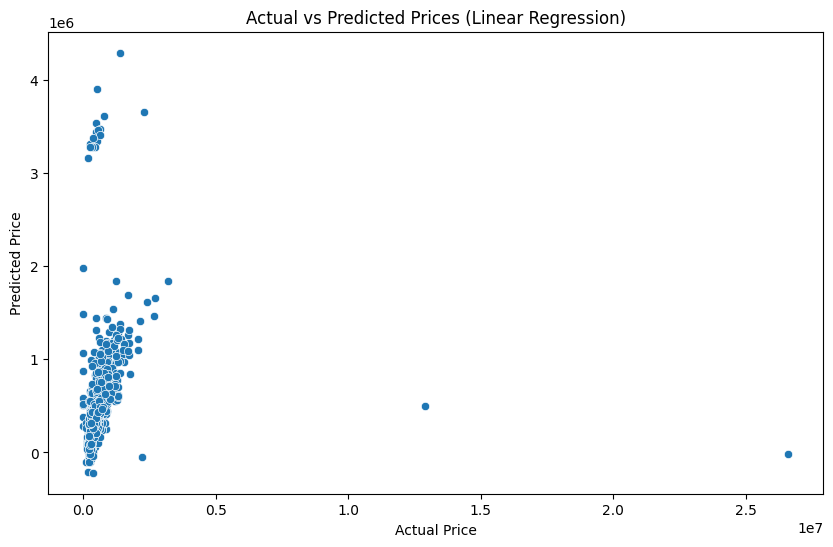

In [ ]:
y_pred_lr = lr.predict(X_test)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_lr)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Prices (Linear Regression)')
plt.show()

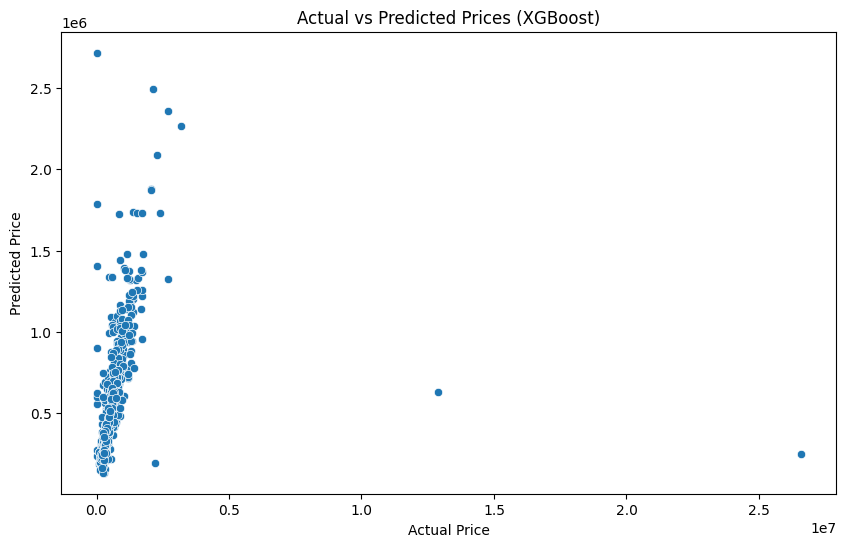

In [ ]:
y_pred_xgb = xgboost.predict(X_test)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_xgb)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Prices (XGBoost)')
plt.show()